# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset (Version may-2016) collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

Rename wrong columns and confusing column.

In [5]:
df.rename(columns={'Hipertension':'hypertension','Handcap':'Handicap','No-show':'Absence'},inplace=True)

In [6]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is patient's age equal to(-1) and it's impossible, So this row needed to be dropped

In [7]:
df.drop(99832,axis=0,inplace=True)
df.shape

(110526, 14)

Check missing values

In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
Absence           0
dtype: int64

There are no missing values

Check data types

In [9]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
Absence            object
dtype: object

In [10]:
type(df['ScheduledDay'][1])

str

In [11]:
type(df['AppointmentDay'][1])

str

All types is good except ScheduledDay& AppointmentDay are strings ,So they need to be turned to date time for easy visualization

In [12]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'].apply(lambda x: x[:10]))

In [13]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'].apply(lambda x: x[:10]))

In [14]:
type(df['ScheduledDay'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
type(df['AppointmentDay'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df['waitingdays'] = df['AppointmentDay']-df['ScheduledDay']
df['waitingdays'] = df['waitingdays'].astype(str).apply(lambda x: x.split()[0]).astype('int64')

AppointmentID & PatientId columns introduce the same information so i'll drop AppointmentID

In [17]:
df.drop(['AppointmentID'],axis=1,inplace=True);

Checking duplicated values

In [18]:
df.duplicated().sum()

4222

In [19]:
df.drop_duplicates();

There's the clear data

In [20]:
df.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,waitingdays
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

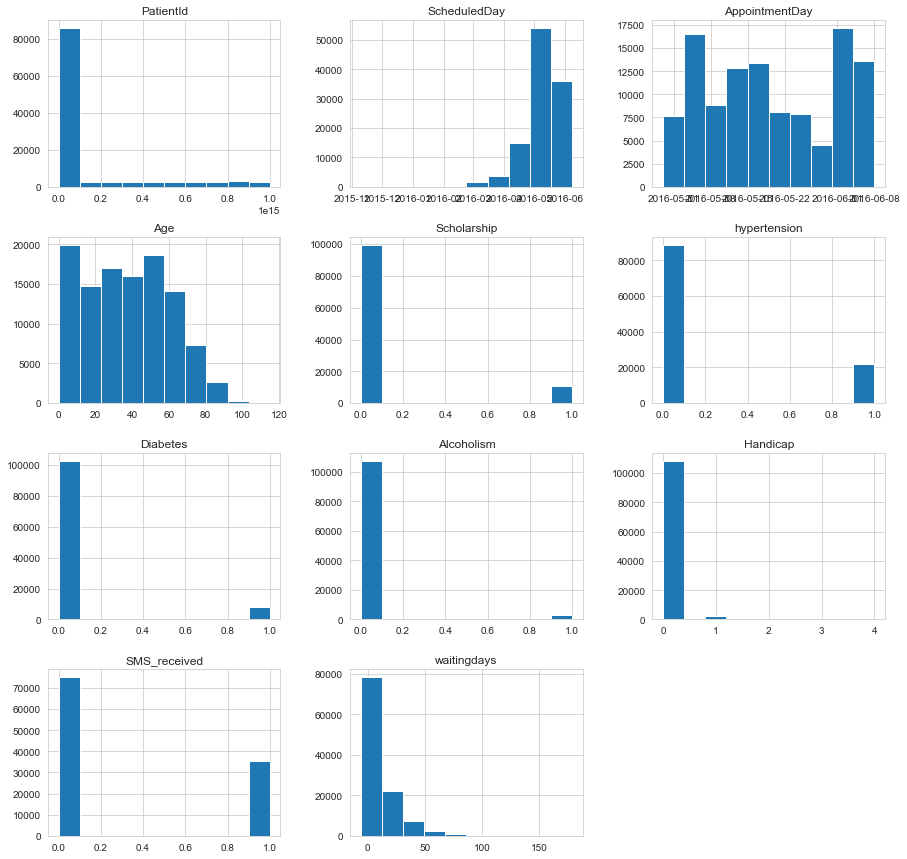

In [21]:
sns.set_style("whitegrid")
df.hist(figsize=(15,15));

Most columns have only two values except Age, Neighbourhood & waiting days need more investigation.

Check of Absence percentage.

No     0.798066
Yes    0.201934
Name: Absence, dtype: float64

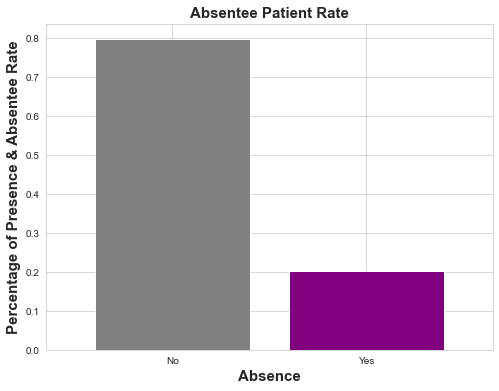

In [22]:
df['Absence'].value_counts(normalize=True).plot.bar(rot=0,figsize=(8,6),width=0.8,color=['grey','purple'])
plt.xlabel('Absence',weight = "bold", fontsize=15)
plt.ylabel('Percentage of Presence & Absentee Rate',weight = "bold", fontsize=15)
plt.title('Absentee Patient Rate',weight = "bold", fontsize=15)
df['Absence'].value_counts(normalize=True)

It seems about 20% of patients didn't show up

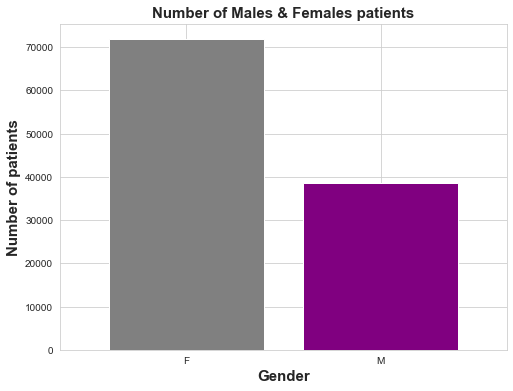

In [23]:
df['Gender'].value_counts().plot.bar(rot=0,figsize=(8,6),width=0.8,color=['grey','purple'])
plt.xlabel('Gender',weight = "bold", fontsize=15)
plt.ylabel('Number of patients',weight = "bold", fontsize=15)
plt.title('Number of Males & Females patients',weight = "bold", fontsize=15);

Gender,F,M
Absence,,
No,0.796851,0.800321
Yes,0.203149,0.199679


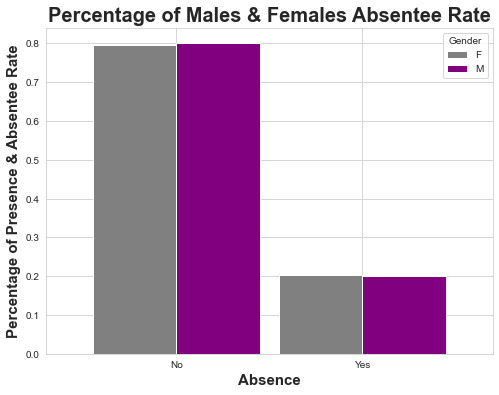

In [24]:
df.groupby('Gender')['Absence'].value_counts(normalize=True).unstack('Gender').plot.bar(rot=0,figsize=(8,6),width=0.9,color=['grey','purple']);
plt.xlabel('Absence',weight = "bold", fontsize=15)
plt.ylabel('Percentage of Presence & Absentee Rate',weight = "bold", fontsize=15)
plt.title('Percentage of Males & Females Absentee Rate',weight = "bold", fontsize=20);
df.groupby('Gender')['Absence'].value_counts(normalize=True).unstack('Gender')

Although the number of females is greater, the absence rate for both sexes is equal

Scholarship,0,1
Absence,,
No,0.801926,0.762637
Yes,0.198074,0.237363


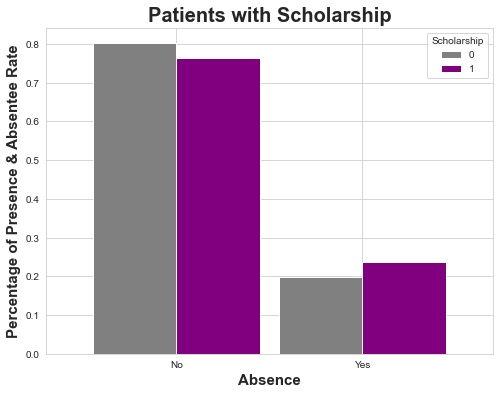

In [25]:
df.groupby('Scholarship')['Absence'].value_counts(normalize=True).unstack('Scholarship').plot.bar(rot=0,figsize=(8,6),width=0.9,color=['grey','purple']);
plt.xlabel('Absence',weight = "bold", fontsize=15)
plt.ylabel('Percentage of Presence & Absentee Rate',weight = "bold", fontsize=15)
plt.title('Patients with Scholarship',weight = "bold", fontsize=20);
df.groupby('Scholarship')['Absence'].value_counts(normalize=True).unstack('Scholarship')

It is noted that the absence rate for people who have a scholarship is slightly higher than for those who do not



Are the patients absent less or not?

hypertension,0,1
Absence,,
No,0.790961,0.82698
Yes,0.209039,0.17302


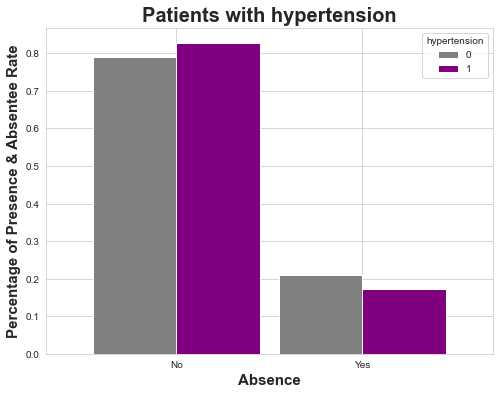

In [26]:
df.groupby('hypertension')['Absence'].value_counts(normalize=True).unstack('hypertension').plot.bar(rot=0,figsize=(8,6),width=0.9,color=['grey','purple']);
plt.xlabel('Absence',weight = "bold", fontsize=15)
plt.ylabel('Percentage of Presence & Absentee Rate',weight = "bold", fontsize=15)
plt.title('Patients with hypertension',weight = "bold", fontsize=20);
df.groupby('hypertension')['Absence'].value_counts(normalize=True).unstack('hypertension')

Hypertension patients are committed to not being absent

Diabetes,0,1
Absence,,
No,0.79637,0.819967
Yes,0.20363,0.180033


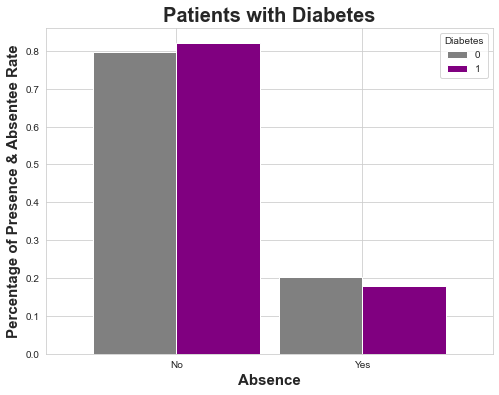

In [27]:
df.groupby('Diabetes')['Absence'].value_counts(normalize=True).unstack('Diabetes').plot.bar(rot=0,figsize=(8,6),width=0.9,color=['grey','purple']);
plt.xlabel('Absence',weight = "bold", fontsize=15)
plt.ylabel('Percentage of Presence & Absentee Rate',weight = "bold", fontsize=15)
plt.title('Patients with Diabetes',weight = "bold", fontsize=20);
df.groupby('Diabetes')['Absence'].value_counts(normalize=True).unstack('Diabetes')

Also Diabetes patients are committed to not being absent

Alcoholism,0,1
Absence,,
No,0.798052,0.798512
Yes,0.201948,0.201488


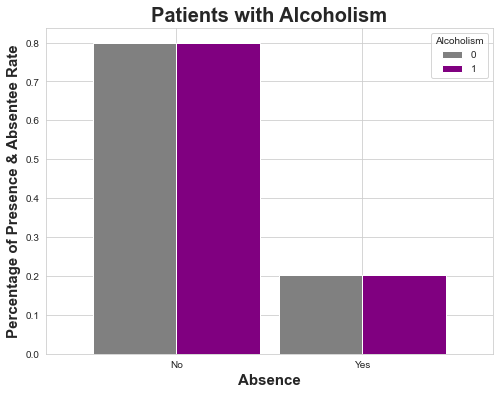

In [28]:
df.groupby('Alcoholism')['Absence'].value_counts(normalize=True).unstack('Alcoholism').plot.bar(rot=0,figsize=(8,6),width=0.9,color=['grey','purple']);
plt.xlabel('Absence',weight = "bold", fontsize=15)
plt.ylabel('Percentage of Presence & Absentee Rate',weight = "bold", fontsize=15)
plt.title('Patients with Alcoholism',weight = "bold", fontsize=20);
df.groupby('Alcoholism')['Absence'].value_counts(normalize=True).unstack('Alcoholism')

The absence rate between alcoholism patients and normal patients are equal

Handicap,False,True
Absence,,
No,0.797645,0.818385
Yes,0.202355,0.181615


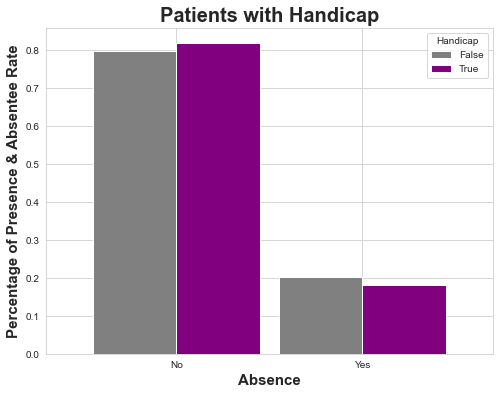

In [29]:
df['Handicap'] = df['Handicap']>=1
df.groupby('Handicap')['Absence'].value_counts(normalize=True).unstack('Handicap').plot.bar(rot=0,figsize=(8,6),width=0.9,color=['grey','purple']);
plt.xlabel('Absence',weight = "bold", fontsize=15)
plt.ylabel('Percentage of Presence & Absentee Rate',weight = "bold", fontsize=15)
plt.title('Patients with Handicap',weight = "bold", fontsize=20);
df.groupby('Handicap')['Absence'].value_counts(normalize=True).unstack('Handicap')

Patients with handicap are more careful not to be absent

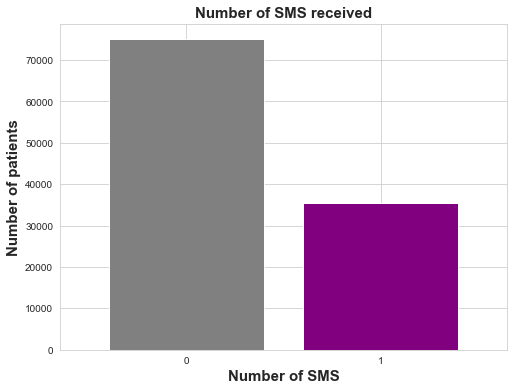

In [30]:
df['SMS_received'].value_counts().plot.bar(rot=0,figsize=(8,6),width=0.8,color=['grey','purple'])
plt.xlabel('Number of SMS',weight = "bold", fontsize=15)
plt.ylabel('Number of patients',weight = "bold", fontsize=15)
plt.title('Number of SMS received',weight = "bold", fontsize=15);

SMS_received,0,1
Absence,,
No,0.832965,0.724255
Yes,0.167035,0.275745


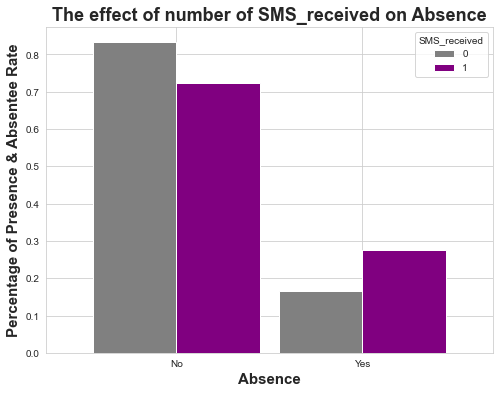

In [31]:
df.groupby('SMS_received')['Absence'].value_counts(normalize=True).unstack('SMS_received').plot.bar(rot=0,figsize=(8,6),width=0.9,color=['grey','purple']);
plt.xlabel('Absence',weight = "bold", fontsize=15)
plt.ylabel('Percentage of Presence & Absentee Rate',weight = "bold", fontsize=15)
plt.title('The effect of number of SMS_received on Absence',weight = "bold", fontsize=18);
df.groupby('SMS_received')['Absence'].value_counts(normalize=True).unstack('SMS_received')

By checking the people who received sms, a large percentage of them were absent, although the people who did not receive sms a lower percentage of them were absent.

In [32]:
#Define a function to draw histogram charts
def draw_hist(group,title,xlabel):
    df[group][df['Absence']=='No'].hist(alpha=0.5,label='presence',bins=len(df[group].unique()),figsize=(20,8))
    df[group][df['Absence']=='Yes'].hist(alpha=0.5,label='absence',bins=len(df[group].unique()),figsize=(20,8))
    plt.title(title,fontsize=20,weight = "bold")
    plt.xlabel(xlabel,fontsize=16,weight = "bold")
    plt.ylabel('Number of patients',weight = "bold", fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(0.9, 0.9), title_fontsize = 12);

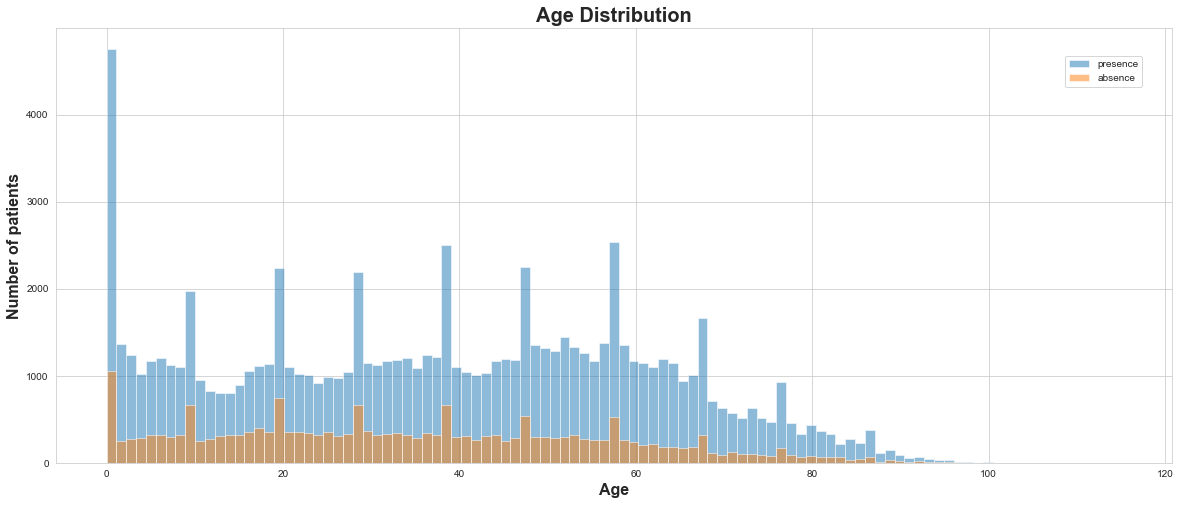

In [33]:
draw_hist('Age','Age Distribution','Age')

By examining age, Most patients'age (0 to 80) & it appears that it's a non-influencing factor on absence

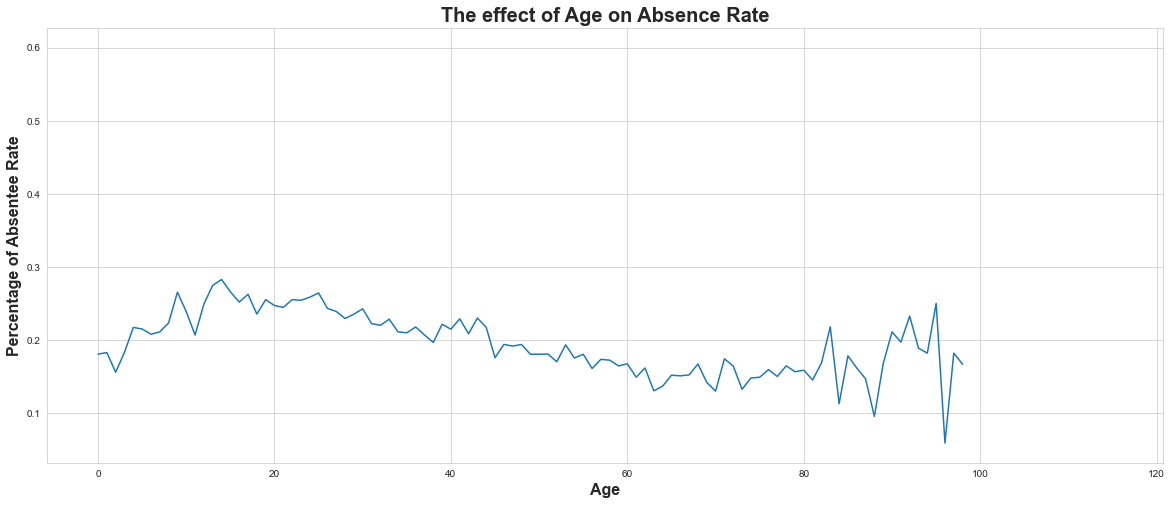

In [34]:
x=df['Age'][df['Absence']=='Yes'].value_counts()
y=df['Age'].value_counts()
z=x/y
z.plot(kind='line',figsize=(20,8))
plt.xlabel('Age',fontsize=16,weight = "bold")
plt.ylabel('Percentage of Absentee Rate',weight = "bold", fontsize=16)
plt.title('The effect of Age on Absence Rate',weight = "bold", fontsize=20);

youth patients [patients age < 45] have higher percentage of absence than older

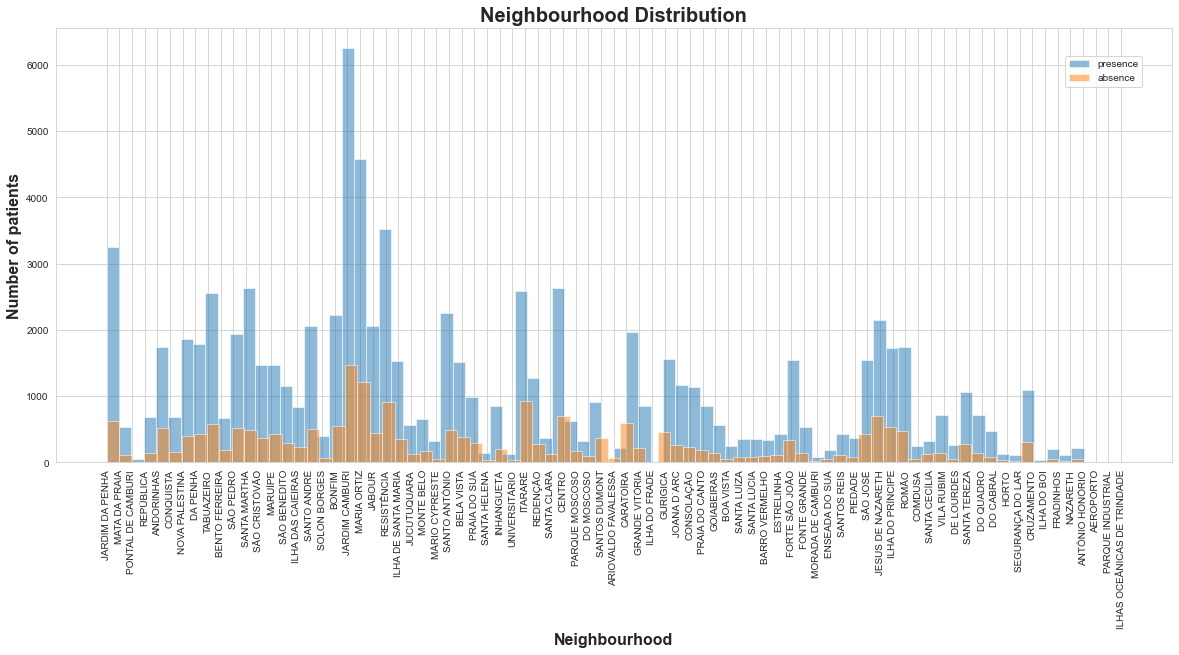

In [35]:
draw_hist('Neighbourhood','Neighbourhood Distribution','Neighbourhood')
plt.xticks(rotation=90);

By examining Neighbourhood, it appears that it's a non-influencing factor on absence

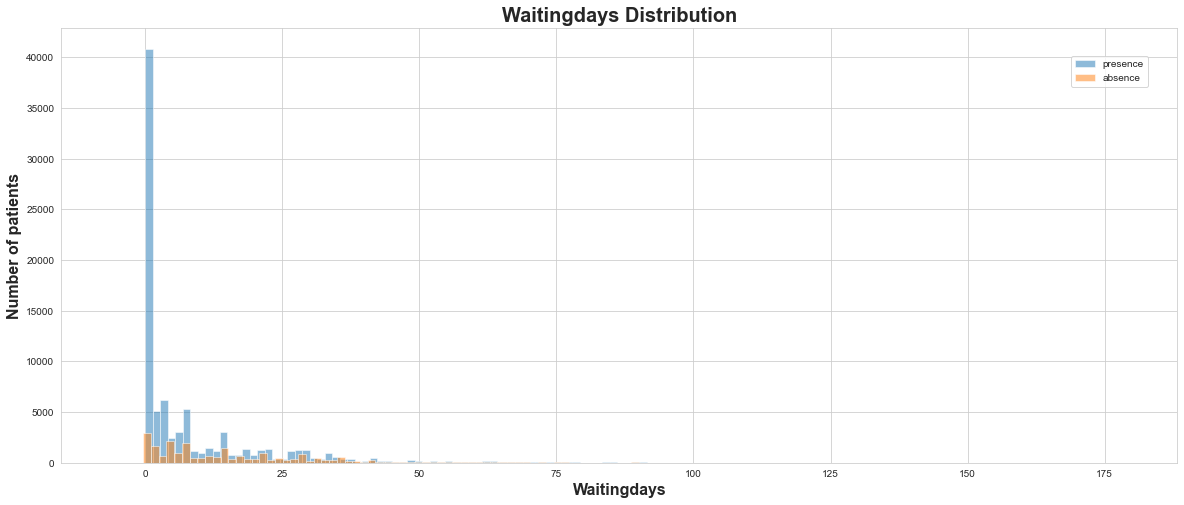

In [36]:
draw_hist('waitingdays','Waitingdays Distribution','Waitingdays')

Most waitingdays less than 25 day

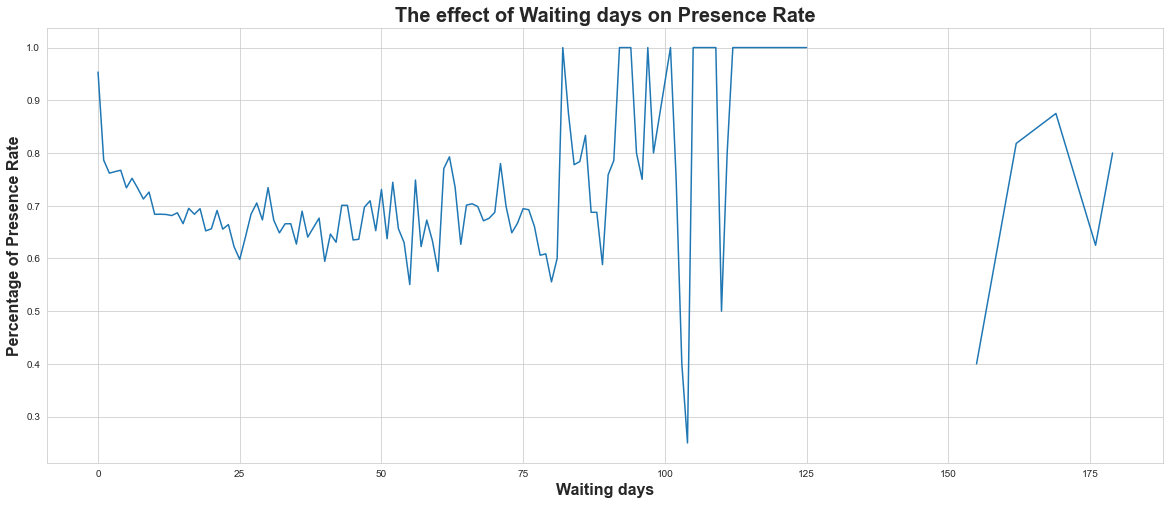

In [37]:
x=df['waitingdays'][df['Absence']=='No'].value_counts()
y=df['waitingdays'].value_counts()
z=x/y
z.plot(kind='line',figsize=(20,8))
plt.xlabel('Waiting days',fontsize=16,weight = "bold")
plt.ylabel('Percentage of Presence Rate',weight = "bold", fontsize=16)
plt.title('The effect of Waiting days on Presence Rate',weight = "bold", fontsize=20);

The more waiting days, the higher the absence rate

<a id='conclusions'></a>
## Conclusions

After research and analysis, Many factors lead to a decrease in the rate of patient presence rate, but some of them have a slight effect, the most important of which are:

1- The age of the patient

2- number of waiting days

3-Chronic diseases such as diabetes, hypertension, or handicap

The location or gender does not affect the percentage of absence rate significantly.

### Limitations

Analyzes are performed without taking into account the Patient Id.

This data needs more information, such as the place of residence of the patient and the number of hospitals in the Neighbourhood.